In [4]:
import pandas as pd
df_all = pd.read_csv('dados_estacao_detalhada_86743800_consolidado_ALL.csv')


C:\Users\fabri\AppData\Local\Temp\ipykernel_29656\276347814.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('dados_estacao_detalhada_86743800_consolidado_ALL.csv')


In [5]:
df = df_all

# Converter a coluna 'Data_Hora_Medicao' para datetime (se necessário)
df['Data_Hora_Medicao'] = pd.to_datetime(df['Data_Hora_Medicao'], errors='coerce')

# Verificar a diferença de tempo entre as medições
df['diff_time'] = df['Data_Hora_Medicao'].diff()

# Identificar medições com intervalo de 1 hora e 15 minutos
df_15min = df[df['diff_time'] == pd.Timedelta(minutes=15)]
df_1hora = df[df['diff_time'] == pd.Timedelta(hours=1)]

# Exibir a quantidade de registros para cada grupo
print("Total de registros com intervalo de 15 minutos:", len(df_15min))
print("Total de registros com intervalo de 1 hora:", len(df_1hora))


# Filtrar dados com intervalos irregulares (outliers temporais)
intervalos_irregulares = df[~df['diff_time'].isin([pd.Timedelta(minutes=15), pd.Timedelta(hours=1)])]
print("Registros com intervalos irregulares:", len(intervalos_irregulares))

# Remover os registros com intervalos irregulares, se necessário
#df_limpo = df.drop(intervalos_irregulares.index)

# Verificar se a remoção dos intervalos irregulares está correta
print("Total de registros :", len(df_all))

# Exibir o DataFrame processado
df_all


Total de registros com intervalo de 15 minutos: 0
Total de registros com intervalo de 1 hora: 49699
Registros com intervalos irregulares: 3130
Total de registros : 52829


,Data_Hora_Medicao,Bateria,Chuva_Acumulada,Chuva_Acumulada_Status,Chuva_Adotada,Chuva_Adotada_Status,Cota_Adotada,Cota_Adotada_Status,Cota_Display,Cota_Display_Status,...,Data_Atualizacao,Pressao_Atmosferica,Pressao_Atmosferica_Status,Temperatura_Agua,Temperatura_Agua_Status,Temperatura_Interna,Vazao_Adotada,Vazao_Adotada_Status,codigoestacao,diff_time
0,2018-01-01 00:00:00,NaN,NaN,NaN,0.0,0,24855.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86743800,NaT
1,2018-01-01 01:00:00,NaN,NaN,NaN,0.0,0,24873.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86743800,0 days 01:00:00
2,2018-01-01 02:00:00,NaN,NaN,NaN,0.0,0,24889.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86743800,0 days 01:00:00
3,2018-01-01 03:00:00,NaN,NaN,NaN,0.0,0,24906.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86743800,0 days 01:00:00
4,2018-01-01 04:00:00,NaN,NaN,NaN,0.0,0,24921.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86743800,0 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52824,NaT,NaN,NaN,NaN,0.0,0,24956.0,0,NaN,NaN,...,2024-08-31 19:52:44.41,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86743800,NaT
52825,NaT,NaN,NaN,NaN,0.0,0,24944.0,0,NaN,NaN,...,2024-08-31 20:52:52.23,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86743800,NaT
52826,NaT,NaN,NaN,NaN,0.0,0,24930.0,0,NaN,NaN,...,2024-08-31 21:53:42.02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86743800,NaT
52827,NaT,NaN,NaN,NaN,0.0,0,24917.0,0,NaN,NaN,...,2024-08-31 22:56:04.75,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86743800,NaT


Resumo estatístico:
       Chuva_Adotada
count     788.000000
mean       10.076142
std        62.204273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       780.000000


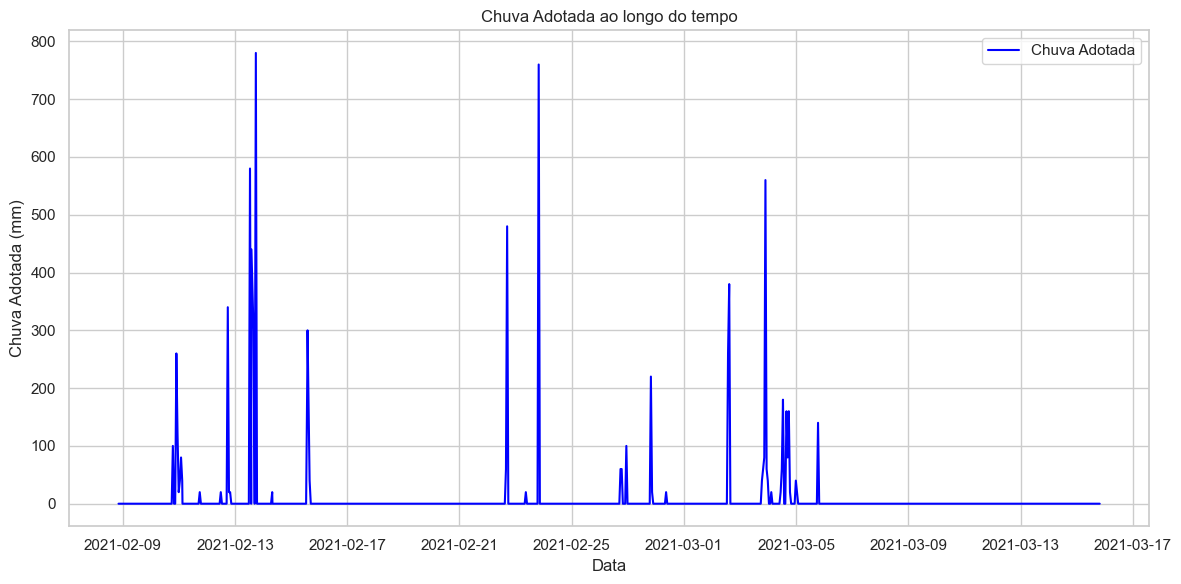

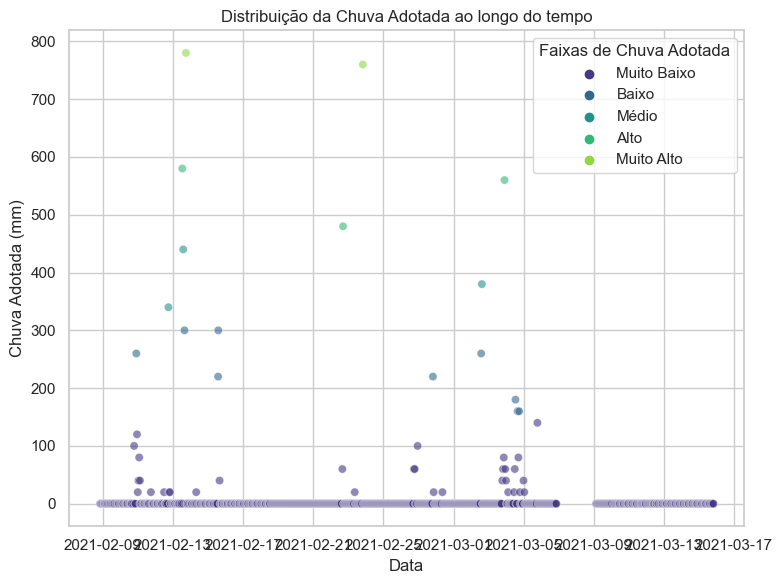

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style='whitegrid')

# Verificar se 'Data_Hora_Medicao' está nas colunas e converter para datetime
if 'Data_Hora_Medicao' in df_all.columns:
    df_all['Data_Hora_Medicao'] = pd.to_datetime(df_all['Data_Hora_Medicao'], errors='coerce')
    # Definir 'Data_Hora_Medicao' como índice
    df_all.set_index('Data_Hora_Medicao', inplace=True)
else:
    # Se já for o índice, garantir que seja do tipo datetime
    df_all.index = pd.to_datetime(df_all.index, errors='coerce')

# Remover linhas com índices inválidos
df_all = df_all[~df_all.index.isna()]

# Ordenar o DataFrame por data
df_all.sort_index(inplace=True)

# Remover valores ausentes na coluna Chuva_Adotada
df_estacao = df_all[['Chuva_Adotada']].dropna()

# Verificar se há dados suficientes para análise
if df_estacao.empty:
    print("Não há dados suficientes para análise após remover valores ausentes.")
else:
    # Calcular estatísticas descritivas
    resumo = df_estacao.describe()
    print("Resumo estatístico:")
    print(resumo)

    # Plotar gráfico da Chuva Adotada ao longo do tempo
    plt.figure(figsize=(12, 6))
    plt.plot(df_estacao.index, df_estacao['Chuva_Adotada'], label='Chuva Adotada', color='blue')
    plt.title('Chuva Adotada ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel('Chuva Adotada (mm)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Agora o gráfico de dispersão com base nas faixas de valores de Chuva Adotada
    plt.figure(figsize=(8, 6))

    # Categorizar a Chuva_Adotada em bins para atribuir cores diferentes
    bins = pd.cut(df_estacao['Chuva_Adotada'], bins=5, labels=["Muito Baixo", "Baixo", "Médio", "Alto", "Muito Alto"])
    
    scatter = sns.scatterplot(x=df_estacao.index, y='Chuva_Adotada', hue=bins, data=df_estacao, palette='viridis', alpha=0.6)

    plt.title('Distribuição da Chuva Adotada ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel('Chuva Adotada (mm)')
    plt.legend(title='Faixas de Chuva Adotada')
    plt.tight_layout()
    plt.show()
